In [ ]:
NAME : ARYAN SIRDESAI
ROLL NO. : TACO20175
Lab Assignment 4 : Data Analytics I

Problem Statement : Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset 
(https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various 
houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv("boston.csv")

In [3]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.


In [4]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

df.drop(['a'],axis=1, inplace=True)


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.shape

(506, 14)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


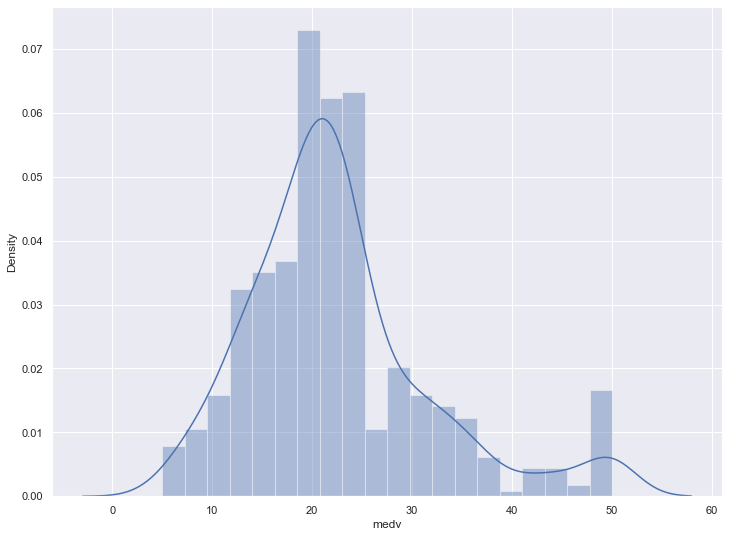

In [8]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(df['medv'], bins=20)
plt.show()

In [9]:
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

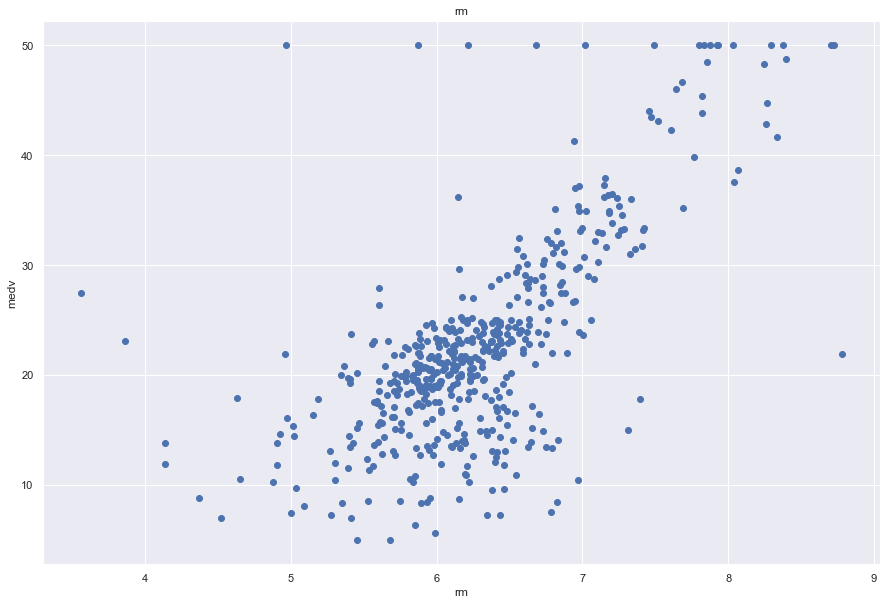

In [10]:
plt.figure(figsize=(15, 10))
plt.title("rm")
plt.xlabel("rm")
plt.ylabel('medv')
plt.scatter(df['rm'],df['medv'])


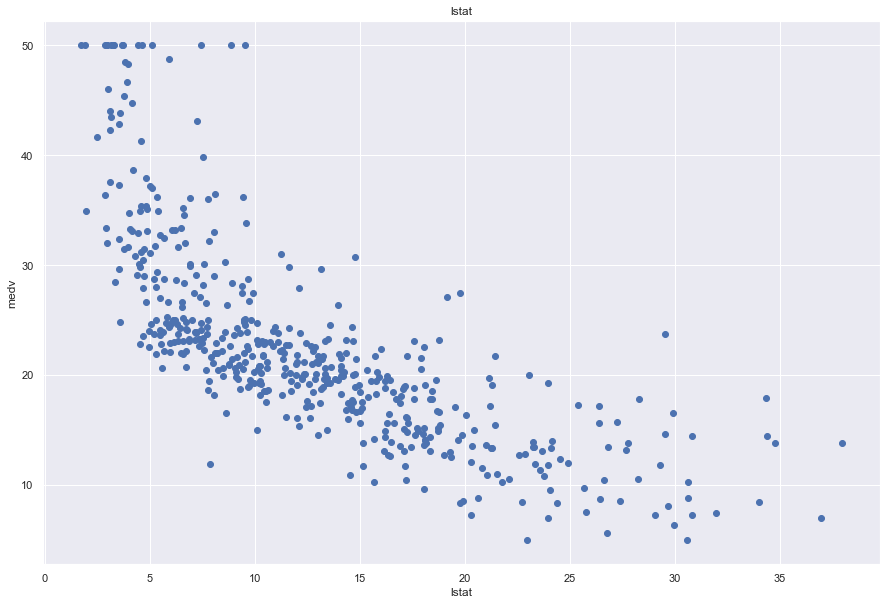

In [11]:
plt.figure(figsize=(15, 10))
plt.title("lstat")
plt.xlabel("lstat")
plt.ylabel('medv')
plt.scatter(df['lstat'],df['medv'])

In [12]:
rm= df['rm']
medv= df['medv']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(rm, medv, test_size = 0.2)


In [14]:
x_train.shape

(404,)

In [15]:
y_train.shape

(404,)

In [16]:
x_test.shape

(102,)

In [17]:
y_test.shape

(102,)

In [18]:
x_train = np.array(x_train).reshape(-1, 1) 
y_train = np.array(y_train).reshape(-1, 1) 
x_test =  np.array(x_test).reshape(-1, 1) 
y_test =  np.array(y_test).reshape(-1, 1) 

In [19]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [20]:
y_predict = model.predict(x_test)


Using rm as independent variable for medv

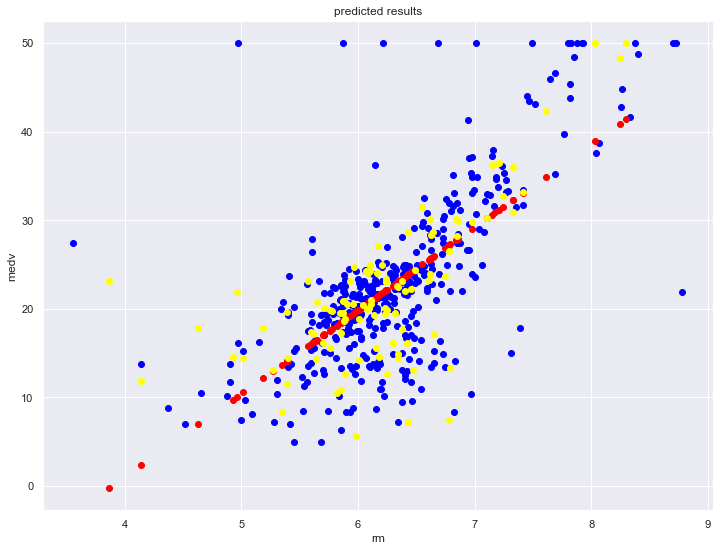

In [21]:
plt.title("predicted results")
plt.xlabel("rm")
plt.ylabel('medv')
plt.scatter(x_train, y_train, color='blue')

plt.scatter(x_test, y_predict, color='red',label="aa")
plt.scatter(x_test, y_test, color="yellow")

Using lstat as independent variable for medv

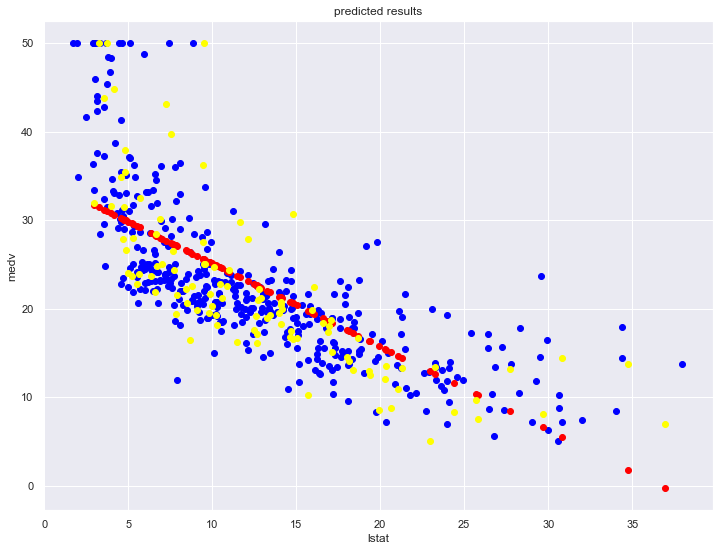

In [22]:
lstat= df['lstat']
x_train, x_test, y_train, y_test = train_test_split(lstat, medv, test_size = 0.2)
x_train = np.array(x_train).reshape(-1, 1) 
y_train = np.array(y_train).reshape(-1, 1) 
x_test =  np.array(x_test).reshape(-1, 1) 
y_test =  np.array(y_test).reshape(-1, 1)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
plt.title("predicted results")
plt.xlabel("lstat")
plt.ylabel('medv')
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_predict, color='red')
plt.scatter(x_test, y_test, color="yellow")

The model performance for testing set



In [23]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
x_train, x_test, y_train, y_test = train_test_split(X, medv, test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)



In [24]:
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

print('Root Mean Squared Error is {}'.format(rmse))

Root Mean Squared Error is 4.622907645726345
